In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import json

EDA GRAMMY AWARDS DATASET

In [6]:
data = "P:/ETL/workshop_002/Data/the_grammy_awards.csv"
grammy = pd.read_csv(data)

In [15]:
def extract_data(filename, db_name, table_name):
    connection = None
    try:
        with open(filename, 'r') as file:
            config = json.load(file)

        connection = psycopg2.connect(
            host='localhost',
            user=config["user"],
            password=config["password"],
            dbname=db_name
        )
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql(query, connection)

        return df

    except (Exception, psycopg2.DatabaseError) as error:
        print(f"Error al consultar datos: {error}")
        return None

    finally:
        if connection:
            connection.close()

if __name__ == "__main__":
    filename = r'P:\ETL\workshop_002\db_config.json'
    db_name = 'workshop2'
    table_name = 'grammy'
    
    df = extract_data(filename, db_name, table_name)
    
    if df is not None:
        print(df)


      year                              title              published_at  \
0     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
1     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
2     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
3     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
4     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
...    ...                                ...                       ...   
4805  1958   1st Annual GRAMMY Awards  (1958) 2017-11-28 08:03:45+00:00   
4806  1958   1st Annual GRAMMY Awards  (1958) 2017-11-28 08:03:45+00:00   
4807  1958   1st Annual GRAMMY Awards  (1958) 2017-11-28 08:03:45+00:00   
4808  1958   1st Annual GRAMMY Awards  (1958) 2017-11-28 08:03:45+00:00   
4809  1958   1st Annual GRAMMY Awards  (1958) 2017-11-28 08:03:45+00:00   

                    updated_at  \
0    2020-05-19 12:10:28+00:00   
1    2020-05-19 12:10:28+00:00 

C:\Users\PAO\AppData\Local\Temp\ipykernel_7544\3548308891.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


We extract the data from database, is called like df.

ANALISYS:

In [19]:
df.head()

year                              title              published_at  \
0  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
1  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
2  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
3  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
4  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   

                 updated_at            category     nominee         artist  \
0 2020-05-19 12:10:28+00:00  Record Of The Year     Bad Guy  Billie Eilish   
1 2020-05-19 12:10:28+00:00  Record Of The Year     Hey, Ma       Bon Iver   
2 2020-05-19 12:10:28+00:00  Record Of The Year     7 rings  Ariana Grande   
3 2020-05-19 12:10:28+00:00  Record Of The Year  Hard Place         H.E.R.   
4 2020-05-19 12:10:28+00:00  Record Of The Year        Talk         Khalid   

                                             workers  \
0  Finneas O'Connell, producer; Rob Kinelski & Fi...   
1  BJ Burton, Brad Cook, Chris Messina & Justin V...   
2  Charles Anderson, Tommy Brown, Michael Foster ...   
3  Rodney “Darkchild” Jerkins, producer; Joseph H...   
4  Disclosure & Denis Kosiak, producers; Ingmar C...   

                                                 img  winner  
0  https://www.grammy.com/sites/com/files/styles/...    True  
1  https://www.grammy.com/sites/com/files/styles/...    True  
2  https://www.grammy.com/sites/com/files/styles/...    True  
3  https://www.grammy.com/sites/com/files/styles/...    True  
4  https://www.grammy.com/sites/com/files/styles/...    True

In [20]:
df.shape

(4810, 10)

Our dataset has a dimension of (4810, 10), i.e. 4,810 grammy, and consists of 10 columns or atributes.

In [26]:
df.nunique()

year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4131
artist          1658
workers         2366
img             1463
winner             1
dtype: int64

This is telling us that in the winners column there is only one type of data and when we check it is "TRUE" then we can understand it as that all the records are those who won a grammy.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          4810 non-null   int64              
 1   title         4810 non-null   object             
 2   published_at  4810 non-null   datetime64[ns, UTC]
 3   updated_at    4810 non-null   datetime64[ns, UTC]
 4   category      4810 non-null   object             
 5   nominee       4804 non-null   object             
 6   artist        2970 non-null   object             
 7   workers       2620 non-null   object             
 8   img           3443 non-null   object             
 9   winner        4810 non-null   bool               
dtypes: bool(1), datetime64[ns, UTC](2), int64(1), object(6)
memory usage: 343.0+ KB


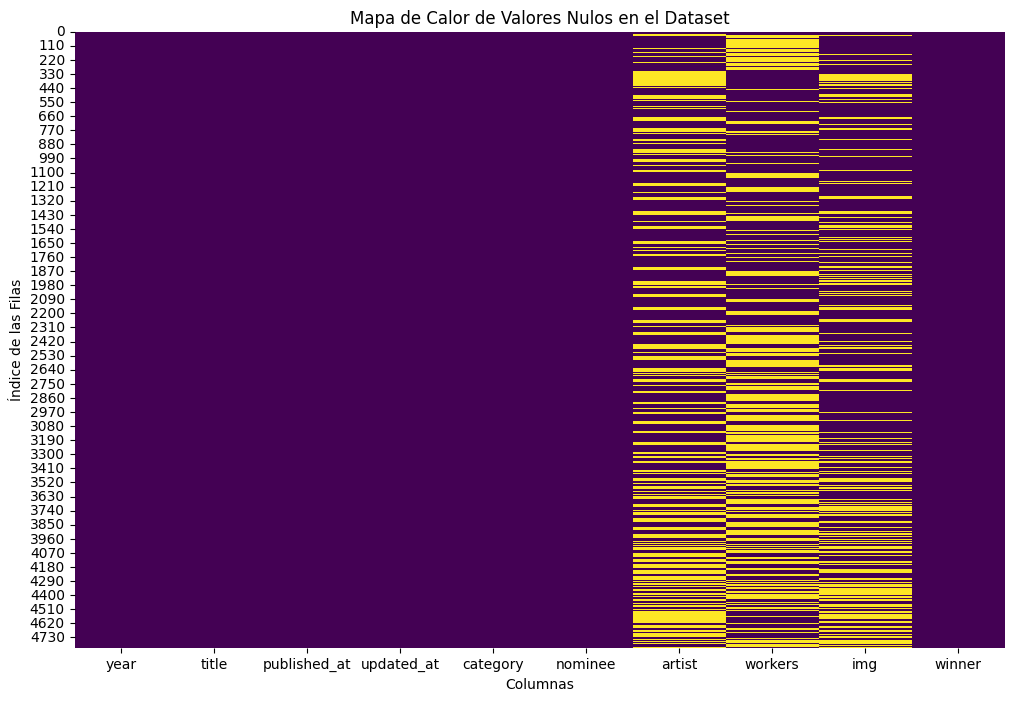

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos en el Dataset')
plt.xlabel('Columnas')
plt.ylabel('Índice de las Filas')
plt.show()

In [25]:
df.isnull().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

In [32]:
df.duplicated().sum()

0

Here, we don't have duplicates and we can see that we are missing an artist(1840), workers(2190) and img(1367), let's review

In [31]:
rows_with_nulls = df[df['artist'].isnull() & df['workers'].isnull()]
print(rows_with_nulls)
num_rows = (df['artist'].isnull() & df['workers'].isnull()).sum()
print("Número de registros con 'artist' y 'workers' nulos:", num_rows)

      year                              title              published_at  \
25    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
26    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
27    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
28    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
29    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
30    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
31    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
32    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
437   2018  61st Annual GRAMMY Awards  (2018) 2018-12-07 07:48:49+00:00   
505   2018  61st Annual GRAMMY Awards  (2018) 2018-12-07 07:48:49+00:00   
509   2018  61st Annual GRAMMY Awards  (2018) 2018-12-07 07:48:49+00:00   
523   2017  60th Annual GRAMMY Awards  (2017) 2018-05-22 10:08:24+00:00   
591   2017  60th Annual G

We will proceed to eliminate the rows that do not have information in artist or workers since these values ​​are essential for our analysis.

In [33]:
mask = df['artist'].isnull() & df['workers'].isnull()
indices_to_drop = df[mask].index
df.drop(indices_to_drop, inplace=True)

num_rows_remaining = df.shape[0]
print("Número de registros restantes en el DataFrame:", num_rows_remaining)
print(df)

Número de registros restantes en el DataFrame: 4624
      year                              title              published_at  \
0     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
1     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
2     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
3     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
4     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
5     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
6     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
7     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
8     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
9     2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
10    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
11    2019  62nd Annual GRAMMY Awards  (2019) 20

With the records without artists or workers, I will proceed to look for the rows where there is no edge, we can find them in workers and fill them.

In [37]:
mask = df['artist'].isnull() & df['workers'].notnull()

rows_with_workers_no_artist = df[mask]
print("Numero de registros donde 'artist' es nulo y 'workers' no es nulo:", len(rows_with_workers_no_artist))
print(rows_with_workers_no_artist)

pd.set_option('display.max_rows', None)
print(rows_with_workers_no_artist)

Numero de registros donde 'artist' es nulo y 'workers' no es nulo: 1654
      year                              title              published_at  \
16    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
17    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
19    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
20    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
21    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
22    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
23    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
24    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
78    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
79    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
80    2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 12:10:28+00:00   
81    2019  62nd Annual GRAM

In [43]:
artists = df['artist'].value_counts().head()
print(artists)

artist
(Various Artists)    66
U2                   18
Aretha Franklin      16
Ella Fitzgerald      13
Bruce Springsteen    13
Name: count, dtype: int64


We have a total of 1654 records where we can find the artist by names in workers. This process will be done in Airflow transformations.

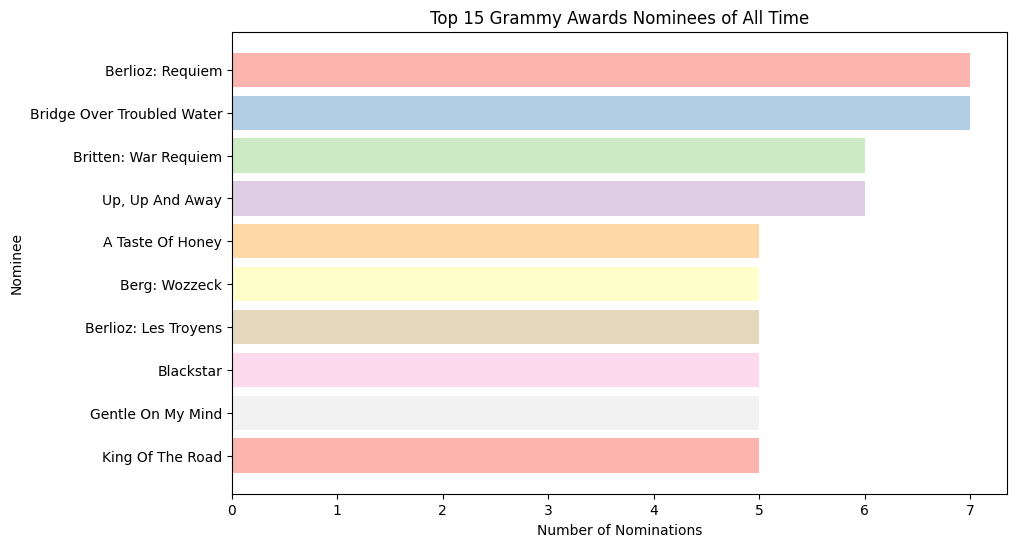

In [53]:
nom_count = df.groupby('nominee').size().reset_index(name='nominations')
nom_count = nom_count.sort_values(by=['nominations', 'nominee'], ascending=[False, True])
top_nominees = nom_count.head(10)


plt.figure(figsize=(10, 6))  
colormap = plt.cm.Pastel1
colors = colormap.colors[:len(top_nominees)] 

plt.barh(top_nominees['nominee'], top_nominees['nominations'], color=colors)
plt.xlabel('Number of grammys') 
plt.ylabel('Nominee') 
plt.title('Top 15 Grammy Awards') 
plt.gca().invert_yaxis()  
plt.show()

In [34]:
df['category'].value_counts()

category
Song Of The Year                                                                                            70
Record Of The Year                                                                                          69
Album Of The Year                                                                                           66
Best Opera Recording                                                                                        64
Best Album Notes                                                                                            63
Best Country Song                                                                                           55
Best Instrumental Composition                                                                               55
Best Historical Album                                                                                       44
Best Chamber Music Performance                                                                         

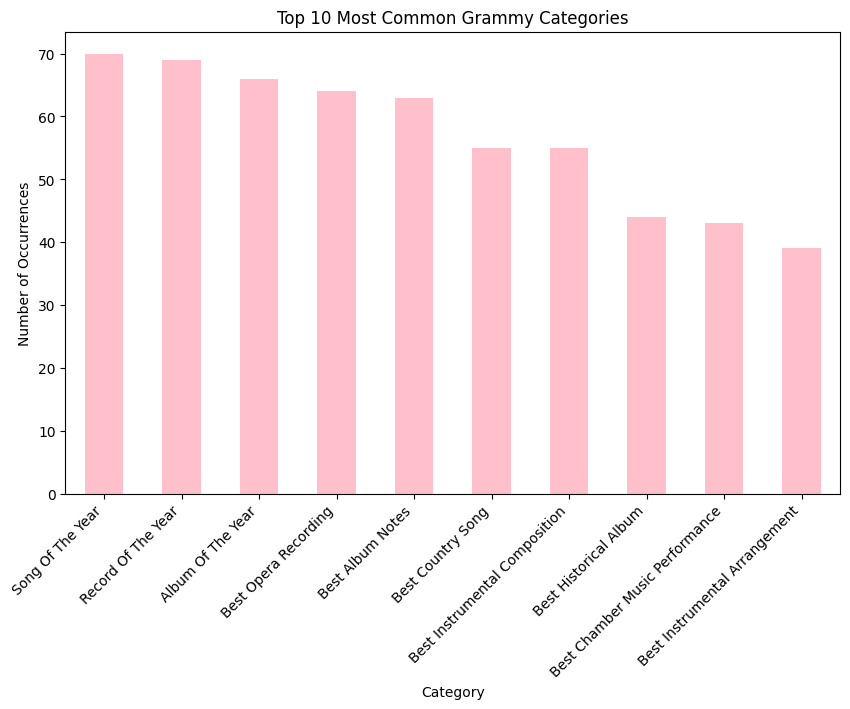

In [36]:
category_counts = df['category'].value_counts()
top_categories = category_counts.head(10)

plt.figure(figsize=(10, 6))  
top_categories.plot(kind='bar', color='pink')

plt.title('Top 10 Most Common Grammy Categories')
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

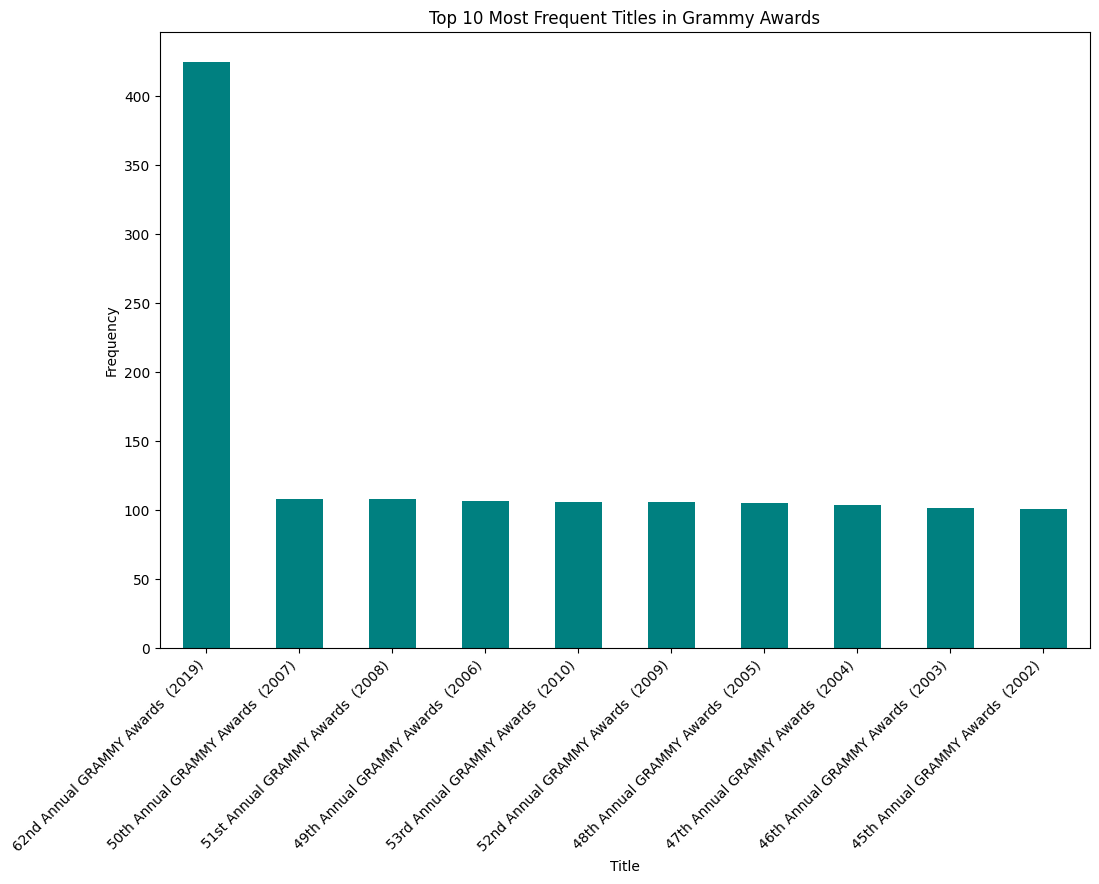

In [38]:
title_counts = df['title'].value_counts()
top_titles = title_counts.head(10)

plt.figure(figsize=(12, 8))
top_titles.plot(kind='bar', color='teal')

plt.title('Top 10 Most Frequent Titles in Grammy Awards')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

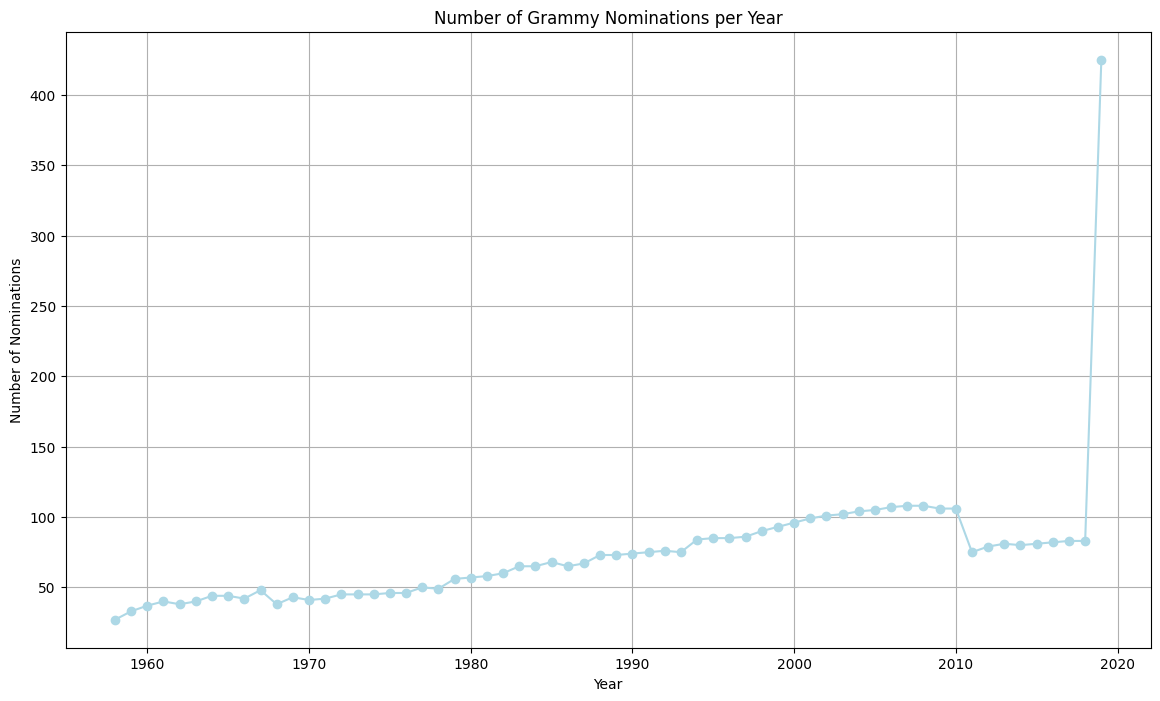

In [41]:
nominations_per_year = df.groupby('year').size()

plt.figure(figsize=(14, 8))  
nominations_per_year.plot(kind='line', marker='o', linestyle='-', color='lightblue')

plt.title('Number of Grammy Nominations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Nominations')
plt.grid(True)  
plt.show()

We can see that have more registers in 2019 than on other years, showing why 2019 is in the top 1 and the others have the same number of records.